# Importing Libraries

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import math

In [ ]:
!pip install SciencePlots

import scienceplots
plt.style.use(['science', 'grid', 'no-latex'])

# Initialising Data

In [ ]:
# Initialises data
xData = np.array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]).reshape((-1, 1))
yData = np.array([98, 173, 279, 422, 588, 716, 854, 907, 1139, 1364, 1637, 2074, 2767, 3397])

xData =
# Data that you are predicting for
xPrediction = np.array([2025, 2028]).reshape((-1, 1))

# Codes the data to be in a more manageable range
minXData = np.min(xData)
xData -= minXData
xPrediction -= minXData

In [ ]:
# Applies Gaussian noise to data
def applyNoise(data):
  return data + np.random.normal(0, 0.1 * np.std(data), len(data))


---



# Linear Regression

In [ ]:
model = LinearRegression().fit(xData, yData)

# y = mx + c
m, c = model.coef_[0], model.intercept_
rSquared = model.score(xData, yData)

print(f'Equation: y={m}x+{c}')
print(f'R^2 value: {rSquared}')

yPrediction = model.predict(xPrediction)
print(f'\nPredictions for {xPrediction} are {yPrediction}')

Equation: y=222.59999999999997x+-274.39999999999986
R^2 value: 0.8810868881908206

Predictions for [[19]
 [22]] are [3955.  4622.8]


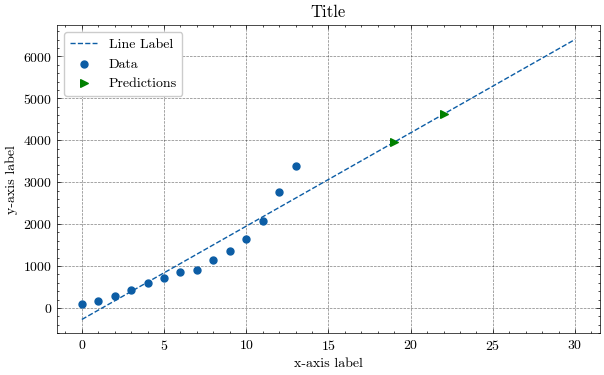

In [ ]:
TITLE = "Title"
X_LABEL = "x-axis label"
Y_LABEL = "y-axis label"
REGRESSION_LABEL = "Line Label"

# Calculates regression line bounds
LOWER_X, UPPER_X = 0, 30
LOWER_Y, UPPER_Y = m * LOWER_X + c, m * UPPER_X + c

# Sets size of graph
plt.figure(figsize=(7,4))

plt.title(TITLE)
plt.xlabel(X_LABEL)
plt.ylabel(Y_LABEL)

# Plots the regression
plt.plot([LOWER_X, UPPER_X], [LOWER_Y, UPPER_Y], linestyle='dashed', label=REGRESSION_LABEL)

# Plots the data and prediction points
plt.scatter(xData, yData, marker="o", s=25, label="Data")
plt.scatter(xPrediction, yPrediction, color='green', marker=">", s=30, zorder=2, label="Predictions")

plt.legend()
plt.show()

In [ ]:
diff = np.zeros(len(xPrediction))

# Creates 20 models with random noise applied
# Calculates the average percentage difference for each of the predictions
for _ in range(20):
  model = LinearRegression().fit(xData, applyNoise(yData))
  prediction = model.predict(xPrediction)
  diff += np.abs(yPrediction - prediction)

sensitivity = (diff / 20) / yPrediction
print(f'Percentage changes for {xPrediction} are {sensitivity}')

Percentage changes for [[19]
 [22]] are [0.02105365 0.0216403 ]


# Exponential Regression


In [ ]:
# model = TransformedTargetRegressor(regressor=LinearRegression(), func=np.log1p, inverse_func=np.expm1).fit(xData, yData)

# # m, c = model.coef_[0], model.intercept_
# rSquared = model.score(xData, yData)

# # print(f'Equation: y={m}x+{c}')
# print(f'R^2 value: {rSquared}')

# yPrediction = model.predict(xPrediction)
# print(f'\nPredictions for {xPrediction} are {yPrediction}')



# Applies a logarithmic scale
lnYData = np.log(yData)


# Creates a linear regression model on the ln'd data
model = LinearRegression().fit(xData, lnYData)

# y=ae^(bx) <- ln(y) = bx + ln(a)
m, c = model.coef_[0], model.intercept_
a, b = math.exp(c), m

rSquared = model.score(xData, lnYData)

print(f'Equation: y=({a})e^({b}x)')
print(f'R^2 value: {rSquared}')

lnYPrediction = model.predict(xPrediction)
yPrediction = np.exp(lnYPrediction)
print(f'\nPredictions for {xPrediction} are {yPrediction}')

Equation: y=(163.04843718801797)e^(0.24130109012290038x)
R^2 value: 0.9562152421205659

Predictions for [[19]
 [22]] are [15974.80431408 32947.52093853]


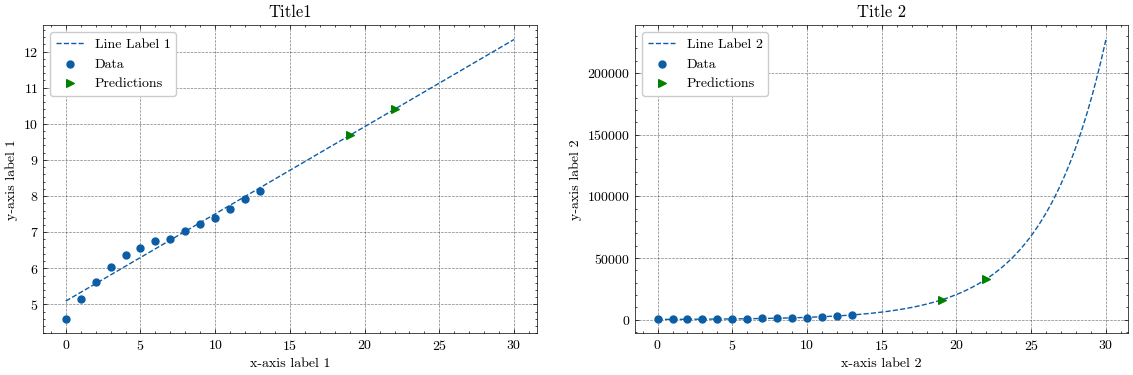

In [ ]:
yData2 = [lnYData, yData]
yPrediction2 = [lnYPrediction, yPrediction]

TITLE = ["Title1", "Title 2"]
X_LABEL = ["x-axis label 1", "x-axis label 2"]
Y_LABEL = ["y-axis label 1", "y-axis label 2"]
REGRESSION_LABEL = ["Line Label 1", "Line Label 2"]
LOWER_X, UPPER_X = 0, 30

# Plot 0 is the ln graph and plot 1 is the regular
fig, axis = plt.subplots(1,2, figsize=(14,4))

for i, ax in enumerate(axis):
  ax.set_title(TITLE[i])
  ax.set_xlabel(X_LABEL[i])
  ax.set_ylabel(Y_LABEL[i])

  if i == 0:
    # Calculates and plots linear regression line
    lowerY, upper_Y = m * LOWER_X + c, m * UPPER_X + c
    ax.plot([LOWER_X, UPPER_X], [lowerY, upper_Y], linestyle='dashed', label=REGRESSION_LABEL[i])

  else:
    # Calculates and plots exponential regression line
    line = np.linspace(LOWER_X, UPPER_X, 100)
    ax.plot(line, np.exp(model.predict(line.reshape(-1, 1))), linestyle='dashed', label=REGRESSION_LABEL[i])

  # Plots the data and prediction points
  ax.scatter(xData, yData2[i], marker="o", s=25, label="Data")
  ax.scatter(xPrediction, yPrediction2[i], color='green', marker=">", s=30, zorder=2, label="Predictions")

  ax.legend()

plt.show()

In [ ]:
diff = np.zeros(len(xPrediction))

# Creates 20 models with random noise applied
# Calculates the average percentage difference for each of the predictions
for _ in range(20):
  model = LinearRegression().fit(xData, applyNoise(lnYData))
  prediction = np.exp(model.predict(xPrediction))
  diff += np.abs(yPrediction - prediction)

sensitivity = (diff / 20) / yPrediction
print(sensitivity)

[0.07513878 0.0930588 ]


# Logistic Regression

In [ ]:
L = 100000

transformedYData = np.log(L / yData - 1)

model = LinearRegression().fit(xData, transformedYData)

#                  L                     /   L   \
# y = --------------------------  <-  ln| ------- | = -kx + kx_0
#      1 + e ^ [-k * (x - x_0)]          \ y - 1 /

m, c = model.coef_[0], model.intercept_
k, x0 = -m, c / m

rSquared = model.score(xData, transformedYData)

print(f'Equation: y=L / (1 + e^-({k}(x-{x0})))')
print(f'R^2 value: {rSquared}')

transformedYPrediction = model.predict(xPrediction)
yPrediction = L / (1 + np.exp(transformedYPrediction))
print(f'\nPredictions for {xPrediction} are {yPrediction}')

Equation: y=L / (1 + e^-(0.24356063365106226(x--26.36601700812269)))
R^2 value: 0.9574789520669701

Predictions for [[19]
 [22]] are [14257.42377444 25666.21794477]


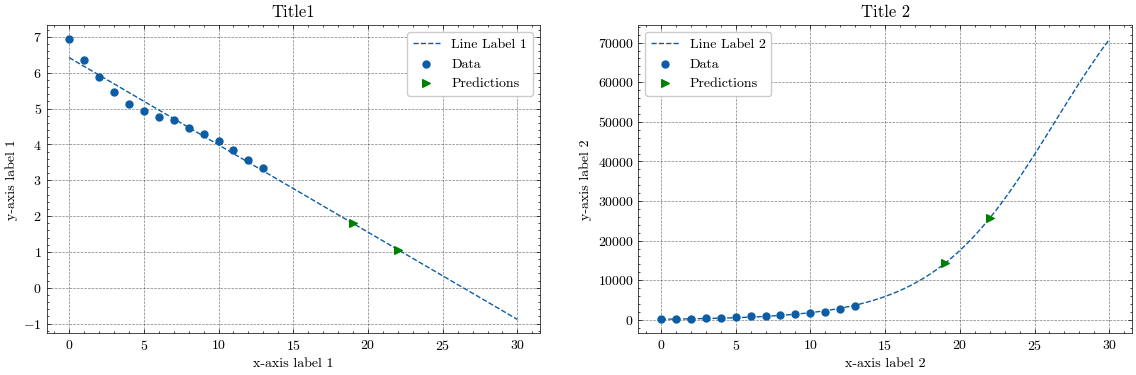

In [ ]:
yData2 = [transformedYData, yData]
yPrediction2 = [transformedYPrediction, yPrediction]

TITLE = ["Title1", "Title 2"]
X_LABEL = ["x-axis label 1", "x-axis label 2"]
Y_LABEL = ["y-axis label 1", "y-axis label 2"]
REGRESSION_LABEL = ["Line Label 1", "Line Label 2"]
LOWER_X, UPPER_X = 0, 30

# Plot 0 is the ln graph and plot 1 is the regular
fig, axis = plt.subplots(1,2, figsize=(14,4))

for i, ax in enumerate(axis):
  ax.set_title(TITLE[i])
  ax.set_xlabel(X_LABEL[i])
  ax.set_ylabel(Y_LABEL[i])

  if i == 0:
    # Calculates and plots linear regression line
    lowerY, upper_Y = m * LOWER_X + c, m * UPPER_X + c
    ax.plot([LOWER_X, UPPER_X], [lowerY, upper_Y], linestyle='dashed', label=REGRESSION_LABEL[i])

  else:
    # Calculates and plots exponential regression line
    line = np.linspace(LOWER_X, UPPER_X, 100)
    ax.plot(line, L / (1 + np.exp(model.predict(line.reshape(-1, 1)))), linestyle='dashed', label=REGRESSION_LABEL[i])

  # Plots the data and prediction points
  ax.scatter(xData, yData2[i], marker="o", s=25, label="Data")
  ax.scatter(xPrediction, yPrediction2[i], color='green', marker=">", s=30, zorder=2, label="Predictions")

  ax.legend()

plt.show()

In [ ]:
diff = np.zeros(len(xPrediction))

# Creates 20 models with random noise applied
# Calculates the percentage difference for each of the predictions
for _ in range(20):
  model = LinearRegression().fit(xData, applyNoise(transformedYData))
  prediction = L / (1 + model.predict(xPrediction))
  diff += np.abs(yPrediction - prediction)

sensitivity = (diff / 20) / yPrediction
print(sensitivity)

[1.51603089 0.89805547]




---


# Class Method

In [ ]:
class Regresssion():
  def __init__(self):
    pass

  def createModel(self, xData, yData):
    pass

  def plotModel(self, predictions = []):
    pass

Equation: y=0.26112956810631227x+-521.413953488372
R^2 value: 0.977370669197911
[7.11229236 7.6345515  8.15681063]


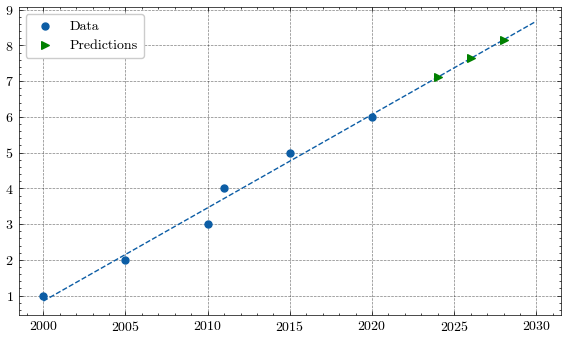

[0.03965179 0.04160186 0.04341177]


In [ ]:
class LinearRegressionModel(Regresssion):
  def createModel(self, xData, yData):
    self.xData = xData
    self.yData = yData
    self.model = LinearRegression().fit(self.xData, self.yData)

    self.m, self.c = self.model.coef_[0], self.model.intercept_
    self.rSquared = self.model.score(self.xData, self.yData)

  def printInfo(self):
    print(f'Equation: y={self.m}x+{self.c}')
    print(f'R^2 value: {self.rSquared}')

  def predict(self, xPrediction):
    return self.model.predict(xPrediction)

  def plotModel(self, xPrediction = [], TITLE='', X_LABEL='', Y_LABEL='', REGRESSION_LABEL='', LOWER_X=None, UPPER_X=None):
    # Sets size of graph
    plt.figure(figsize=(7,4))

    plt.title(TITLE)
    plt.xlabel(X_LABEL)
    plt.ylabel(Y_LABEL)

    # Calculates regression line bounds
    if LOWER_X == None:
      LOWER_X = np.min(self.xData)

    if UPPER_X == None:
      UPPER_X = np.max(self.xData)

    LOWER_Y, UPPER_Y = self.m * LOWER_X + self.c, self.m * UPPER_X + self.c

    # Plots the line
    plt.plot([LOWER_X, UPPER_X], [LOWER_Y, UPPER_Y], linestyle='dashed', label=REGRESSION_LABEL)

    # Plots the data and predictions
    plt.scatter(self.xData, self.yData, marker="o", s=25, label="Data")

    if len(xPrediction) != 0:
      plt.scatter(xPrediction, self.predict(xPrediction), color='green', marker=">", s=30, zorder=2, label="Predictions")

    plt.legend(loc="upper left")

    plt.show()

def sensitivityAnalysis(modelType, xData, yData, xPrediction):
  model = modelType()
  model.createModel(xData, applyNoise(yData))
  originalPrediction = model.predict(xPrediction)
  diff = np.zeros(len(xPrediction))

  for _ in range(20):
    model.createModel(xData, applyNoise(yData))
    prediction = model.predict(xPrediction)
    diff += np.abs(originalPrediction - prediction)

  return (diff / 20) / originalPrediction

linearRegression = LinearRegressionModel()
linearRegression.createModel(xData, yData)
linearRegression.printInfo()
print(linearRegression.predict(xPrediction))
linearRegression.plotModel(xPrediction, UPPER_X=2030)
print(sensitivityAnalysis(LinearRegressionModel, xData, yData, xPrediction))